# Prueba técnica Data Science
### Por: Luis Carlos Sánchez Ruiz

En Los Ángeles existe un sistema compartido de bicicletas que brinda datos anónimos acerca
del uso del servicio. La tabla que se proporciona contiene el histórico de viajes que se han
realizado desde 2016 y contiene una columna que es de particular interés y que se buscará
analizar a más profundidad: Passholder_type. A continuación se presentan las columnas
que contiene la tabla:
- trip_id: identificador único para el viaje
- duration: duración del viaje en minutos
- start_time: dia/hora donde en viaje inicia en formato ISO 8601 tiempo local
- end_time: dia/hora donde el viaje termina en formato ISO 8601 tiempo local
- start_station: la estación donde el viaje inició
- start_lat: la latitud de la estación donde el viaje se originó
- start_lon: la longitud de la estación donde el viaje se originó
- end_station: la estación donde el viaje terminó
- end_lat: la latitud de la estación donde terminó el viaje
- end_lon: la longitud de la estación donde terminó el viaje
- bike_id: un entero único que identifica la bicicleta
- plan_duration: número de días que el usuario tendrá el paso. 0 significa un viaje único
(Walk-up plan)
- trip_route_category: “Round trip” son viajes que empiezan y terminan en la misma
estación
- passholder_type: El nombre del plan de passholder

## Tareas a realizar:

1) Exploratorio de datos: Para comenzar la asignación se requiere realizar un análisis exploratorio de datos que busque contestar preguntas relevantes a los siguientes dos temas:
- Saturación del servicio: La empresa busca contar con la disponibilidad más alta de servicio en el mercado, por lo que se quiere entender cómo se comporta la demanda de servicio en las distintas estaciones y horarios para cada plan.
- Crecimiento de planes: Se tiene la intuición que la tendencia en uso de bicicletas compartidas va a la alta, por lo que se requiere realizar una correcta planificación de bicicletas que deben tener. Adicionalmente, se espera que los planes de consumo anual crezcan en mayor proporción.

In [1]:
# Importamos las librerías que vamos a utilizar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Leemos la tabla
datos_train = pd.read_csv("C:\\Users\\Luis Carlos\\Documents\\Prueba_Arkon\\train_set.csv")

In [3]:
# Mostramos la tabla
datos_train

,trip_id,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station
0,101750280,35,2018-08-07 11:20:00,2018-08-07 11:55:00,33.748920,-118.275192,33.748920,-118.275192,06530,1.0,Round Trip,Walk-up,4127,4127
1,46560345,32,9/17/2017 17:51,9/17/2017 18:23,34.035679,-118.270813,34.047749,-118.243172,6683,0.0,One Way,Walk-up,3057,3062
2,120016336,6,2019-04-22 09:22:00,2019-04-22 09:28:00,34.046070,-118.233093,34.047749,-118.243172,06710,30.0,One Way,Monthly Pass,3022,3062
3,129547190,138,9/22/2019 11:27,9/22/2019 13:45,34.062580,-118.290092,34.059689,-118.294662,17068,1.0,One Way,One Day Pass,4304,4311
4,136619463,14,1/31/2020 17:11,1/31/2020 17:25,34.026291,-118.277687,34.021660,-118.278687,18841,30.0,One Way,Monthly Pass,4266,4443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,83666862,17,2018-04-25 18:32:00,2018-04-25 18:49:00,34.049889,-118.255882,34.074829,-118.258728,06505,30.0,One Way,Monthly Pass,3032,4220
699996,132547303,9,2019-11-12 16:49:10,2019-11-12 16:58:51,34.039188,-118.232529,34.056610,-118.237213,18348,30.0,One Way,Monthly Pass,3036,3014
699997,67332628,6,2018-01-13 15:49:00,2018-01-13 15:55:00,34.049889,-118.255882,34.050480,-118.254593,05718,365.0,One Way,Flex Pass,3032,3007
699998,114846232,3,2019-02-04 14:16:00,2019-02-04 14:19:00,34.045181,-118.250237,34.045540,-118.256668,12195,1.0,One Way,Walk-up,3067,3006


Tenemos una tabla con 700,000 filas y 14 columnas.

Desde el comienzo podemos observar que tendremos problemas a la hora de analizar la tabla, ya que hay columnas que tienen los datos de sus filas con diferentes formatos, lo cual NO debería de suceder. Por ejemplo, en las columnas "start_time" y "end_time" algunas fechas vienen en formato año/mes/día, otros vienen como día/mes/año, incluso unas fechas vienen separadas por guiones (-) en lugar de por diagonales (/). Lo que haremos será corregir estos detalles y separar las fechas y las horas en columnas diferentes para poder analizarlas por separado.	

In [4]:
# Dividir la columna en 2 con el delimitador "espacio"
columnas_start = datos_train['start_time'].str.split(" ", n=1, expand=True)
columnas_end = datos_train['end_time'].str.split(" ", n=1, expand=True)

# Al resultado del split lo ponemos en la primera columna
datos_train['start_time_hour']= columnas_start[1]
datos_train['end_time_hour']= columnas_end[1]

# Hacemos lo mismo con la segunda columna
datos_train['start_time_date']= columnas_start[0]
datos_train['end_time_date']= columnas_end[0]

# Paso opcional, borramos la columna original
datos_train.drop(columns =['start_time'], inplace = True)
datos_train.drop(columns =['end_time'], inplace = True)

In [5]:
datos_train

,trip_id,duration,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station,start_time_hour,end_time_hour,start_time_date,end_time_date
0,101750280,35,33.748920,-118.275192,33.748920,-118.275192,06530,1.0,Round Trip,Walk-up,4127,4127,11:20:00,11:55:00,2018-08-07,2018-08-07
1,46560345,32,34.035679,-118.270813,34.047749,-118.243172,6683,0.0,One Way,Walk-up,3057,3062,17:51,18:23,9/17/2017,9/17/2017
2,120016336,6,34.046070,-118.233093,34.047749,-118.243172,06710,30.0,One Way,Monthly Pass,3022,3062,09:22:00,09:28:00,2019-04-22,2019-04-22
3,129547190,138,34.062580,-118.290092,34.059689,-118.294662,17068,1.0,One Way,One Day Pass,4304,4311,11:27,13:45,9/22/2019,9/22/2019
4,136619463,14,34.026291,-118.277687,34.021660,-118.278687,18841,30.0,One Way,Monthly Pass,4266,4443,17:11,17:25,1/31/2020,1/31/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,83666862,17,34.049889,-118.255882,34.074829,-118.258728,06505,30.0,One Way,Monthly Pass,3032,4220,18:32:00,18:49:00,2018-04-25,2018-04-25
699996,132547303,9,34.039188,-118.232529,34.056610,-118.237213,18348,30.0,One Way,Monthly Pass,3036,3014,16:49:10,16:58:51,2019-11-12,2019-11-12
699997,67332628,6,34.049889,-118.255882,34.050480,-118.254593,05718,365.0,One Way,Flex Pass,3032,3007,15:49:00,15:55:00,2018-01-13,2018-01-13
699998,114846232,3,34.045181,-118.250237,34.045540,-118.256668,12195,1.0,One Way,Walk-up,3067,3006,14:16:00,14:19:00,2019-02-04,2019-02-04


Observamos que separamos las columnas que contenía fechas y horas en columnas diferentes, pero seguimos teniendo el problema de los formatos de las fechas, lo cual corregiremos en el siguiente paso.

In [6]:
# Hacemos que todos los registros de las columnas de fecha tengan el mismo formato
datos_train['start_time_date'] = pd.to_datetime(datos_train['start_time_date']) 
datos_train['start_time_date'] = datos_train['start_time_date'].dt.strftime('%d/%m/%Y')

datos_train['end_time_date'] = pd.to_datetime(datos_train['end_time_date']) 
datos_train['end_time_date'] = datos_train['end_time_date'].dt.strftime('%d/%m/%Y')

In [7]:
datos_train

,trip_id,duration,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station,start_time_hour,end_time_hour,start_time_date,end_time_date
0,101750280,35,33.748920,-118.275192,33.748920,-118.275192,06530,1.0,Round Trip,Walk-up,4127,4127,11:20:00,11:55:00,07/08/2018,07/08/2018
1,46560345,32,34.035679,-118.270813,34.047749,-118.243172,6683,0.0,One Way,Walk-up,3057,3062,17:51,18:23,17/09/2017,17/09/2017
2,120016336,6,34.046070,-118.233093,34.047749,-118.243172,06710,30.0,One Way,Monthly Pass,3022,3062,09:22:00,09:28:00,22/04/2019,22/04/2019
3,129547190,138,34.062580,-118.290092,34.059689,-118.294662,17068,1.0,One Way,One Day Pass,4304,4311,11:27,13:45,22/09/2019,22/09/2019
4,136619463,14,34.026291,-118.277687,34.021660,-118.278687,18841,30.0,One Way,Monthly Pass,4266,4443,17:11,17:25,31/01/2020,31/01/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,83666862,17,34.049889,-118.255882,34.074829,-118.258728,06505,30.0,One Way,Monthly Pass,3032,4220,18:32:00,18:49:00,25/04/2018,25/04/2018
699996,132547303,9,34.039188,-118.232529,34.056610,-118.237213,18348,30.0,One Way,Monthly Pass,3036,3014,16:49:10,16:58:51,12/11/2019,12/11/2019
699997,67332628,6,34.049889,-118.255882,34.050480,-118.254593,05718,365.0,One Way,Flex Pass,3032,3007,15:49:00,15:55:00,13/01/2018,13/01/2018
699998,114846232,3,34.045181,-118.250237,34.045540,-118.256668,12195,1.0,One Way,Walk-up,3067,3006,14:16:00,14:19:00,04/02/2019,04/02/2019


In [8]:
datos_train['plan_duration'].value_counts()

30.0     399178
1.0      184556
0.0       63275
365.0     52545
150.0       160
999.0        78
Name: plan_duration, dtype: int64

Ahora sí, los registros de las columnas "start_time_date" y "end_time_date" tienen el mismo formato. Lo siguiente por hacer será dividir la columna las columnas que tienen formatos de tiempos en columnas específicas para las horas y para los minutos.

In [9]:
# Dividir las columnas con el delimitador "dos puntos"
column_only_hour_start = datos_train['start_time_hour'].str.split(":", n=2, expand=True)
column_only_hour_end = datos_train['end_time_hour'].str.split(":", n=2, expand=True)

#Al resultado del split lo ponemos en columnas diferentes
datos_train['start_time_hour_hour'] = column_only_hour_start[0]
datos_train['start_time_hour_minute'] = column_only_hour_start[1]
datos_train['end_time_hour_hour'] = column_only_hour_end[0]
datos_train['end_time_hour_minute'] = column_only_hour_end[1]

In [10]:
datos_train

,trip_id,duration,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station,start_time_hour,end_time_hour,start_time_date,end_time_date,start_time_hour_hour,start_time_hour_minute,end_time_hour_hour,end_time_hour_minute
0,101750280,35,33.748920,-118.275192,33.748920,-118.275192,06530,1.0,Round Trip,Walk-up,4127,4127,11:20:00,11:55:00,07/08/2018,07/08/2018,11,20,11,55
1,46560345,32,34.035679,-118.270813,34.047749,-118.243172,6683,0.0,One Way,Walk-up,3057,3062,17:51,18:23,17/09/2017,17/09/2017,17,51,18,23
2,120016336,6,34.046070,-118.233093,34.047749,-118.243172,06710,30.0,One Way,Monthly Pass,3022,3062,09:22:00,09:28:00,22/04/2019,22/04/2019,09,22,09,28
3,129547190,138,34.062580,-118.290092,34.059689,-118.294662,17068,1.0,One Way,One Day Pass,4304,4311,11:27,13:45,22/09/2019,22/09/2019,11,27,13,45
4,136619463,14,34.026291,-118.277687,34.021660,-118.278687,18841,30.0,One Way,Monthly Pass,4266,4443,17:11,17:25,31/01/2020,31/01/2020,17,11,17,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,83666862,17,34.049889,-118.255882,34.074829,-118.258728,06505,30.0,One Way,Monthly Pass,3032,4220,18:32:00,18:49:00,25/04/2018,25/04/2018,18,32,18,49
699996,132547303,9,34.039188,-118.232529,34.056610,-118.237213,18348,30.0,One Way,Monthly Pass,3036,3014,16:49:10,16:58:51,12/11/2019,12/11/2019,16,49,16,58
699997,67332628,6,34.049889,-118.255882,34.050480,-118.254593,05718,365.0,One Way,Flex Pass,3032,3007,15:49:00,15:55:00,13/01/2018,13/01/2018,15,49,15,55
699998,114846232,3,34.045181,-118.250237,34.045540,-118.256668,12195,1.0,One Way,Walk-up,3067,3006,14:16:00,14:19:00,04/02/2019,04/02/2019,14,16,14,19


Ahora, hacemos lo mismo para las columnas con fechas. Dividimos las columnas para obtener una sola para día, otra para mes y otra para año. De esta manera será mucho más fácil y rápido hacer un análisis de la tabla.

In [11]:
# Dividir las columnas con el delimitador "diagonal"
column_only_date_start = datos_train['start_time_date'].str.split("/", n=2, expand=True)
column_only_date_end = datos_train['end_time_date'].str.split("/", n=2, expand=True)

#Al resultado del split lo ponemos en columnas diferentes
datos_train['start_time_date_day'] = column_only_date_start[0]
datos_train['start_time_date_month'] = column_only_date_start[1]
datos_train['start_time_date_year'] = column_only_date_start[2]

datos_train['end_time_date_day'] = column_only_date_end[0]
datos_train['end_time_date_month'] = column_only_date_end[1]
datos_train['end_time_date_year'] = column_only_date_end[2]

In [12]:
datos_train

,trip_id,duration,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,...,start_time_hour_hour,start_time_hour_minute,end_time_hour_hour,end_time_hour_minute,start_time_date_day,start_time_date_month,start_time_date_year,end_time_date_day,end_time_date_month,end_time_date_year
0,101750280,35,33.748920,-118.275192,33.748920,-118.275192,06530,1.0,Round Trip,Walk-up,...,11,20,11,55,07,08,2018,07,08,2018
1,46560345,32,34.035679,-118.270813,34.047749,-118.243172,6683,0.0,One Way,Walk-up,...,17,51,18,23,17,09,2017,17,09,2017
2,120016336,6,34.046070,-118.233093,34.047749,-118.243172,06710,30.0,One Way,Monthly Pass,...,09,22,09,28,22,04,2019,22,04,2019
3,129547190,138,34.062580,-118.290092,34.059689,-118.294662,17068,1.0,One Way,One Day Pass,...,11,27,13,45,22,09,2019,22,09,2019
4,136619463,14,34.026291,-118.277687,34.021660,-118.278687,18841,30.0,One Way,Monthly Pass,...,17,11,17,25,31,01,2020,31,01,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,83666862,17,34.049889,-118.255882,34.074829,-118.258728,06505,30.0,One Way,Monthly Pass,...,18,32,18,49,25,04,2018,25,04,2018
699996,132547303,9,34.039188,-118.232529,34.056610,-118.237213,18348,30.0,One Way,Monthly Pass,...,16,49,16,58,12,11,2019,12,11,2019
699997,67332628,6,34.049889,-118.255882,34.050480,-118.254593,05718,365.0,One Way,Flex Pass,...,15,49,15,55,13,01,2018,13,01,2018
699998,114846232,3,34.045181,-118.250237,34.045540,-118.256668,12195,1.0,One Way,Walk-up,...,14,16,14,19,04,02,2019,04,02,2019


Ya quedaron separadas las fechas y las horas en columnas diferentes. Ahora hay que verificar si hay redundancias en los registros de las columnas.

In [13]:
# Verificamos todos los valores diferentes que tiene la columna "start_time_hour_hour"
datos_train.start_time_hour_hour.value_counts()

17    63119
16    58049
18    54707
13    51835
15    51623
12    50755
14    49547
19    43425
11    42435
10    33081
20    31093
21    22546
08    20298
09    18770
22    16050
9     14855
8     13603
07    13315
23    11106
7      8935
06     5633
6      4280
00     3886
0      3241
01     2612
1      2097
05     1698
02     1618
2      1387
5      1253
04      815
4       811
03      807
3       715
Name: start_time_hour_hour, dtype: int64

Hay datos que son los mismos pero que por el hecho de estar escritos de diferente forma el programa o el lenguaje los detecta como valores diferentes. Por ejemplo, el programa piensa que "1" es diferente de "01", que "2" es diferente de "02". Para que los valores tengan el mismo formato haremos que los datos tengan 2 caracteres, es decir, que los valores escritos como "1" se sumen a los valores escritos como "01", y así para todos los números siguientes hasta llegar al 9.

In [14]:
# Corregimos los valores para que queden registrados con 2 caracteres
datos_train['start_time_hour_hour'] = datos_train['start_time_hour_hour'].replace(
    ['6', '0', '1', '2', '5', '4', '3', '9', '8', '7'],['06', '00', '01', '02', '05', '04', '03', '09', '08', '07'])

datos_train['end_time_hour_hour'] = datos_train['end_time_hour_hour'].replace(
    ['6', '0', '1', '2', '5', '4', '3', '9', '8', '7'],['06', '00', '01', '02', '05', '04', '03', '09', '08', '07'])

In [15]:
datos_train

,trip_id,duration,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,...,start_time_hour_hour,start_time_hour_minute,end_time_hour_hour,end_time_hour_minute,start_time_date_day,start_time_date_month,start_time_date_year,end_time_date_day,end_time_date_month,end_time_date_year
0,101750280,35,33.748920,-118.275192,33.748920,-118.275192,06530,1.0,Round Trip,Walk-up,...,11,20,11,55,07,08,2018,07,08,2018
1,46560345,32,34.035679,-118.270813,34.047749,-118.243172,6683,0.0,One Way,Walk-up,...,17,51,18,23,17,09,2017,17,09,2017
2,120016336,6,34.046070,-118.233093,34.047749,-118.243172,06710,30.0,One Way,Monthly Pass,...,09,22,09,28,22,04,2019,22,04,2019
3,129547190,138,34.062580,-118.290092,34.059689,-118.294662,17068,1.0,One Way,One Day Pass,...,11,27,13,45,22,09,2019,22,09,2019
4,136619463,14,34.026291,-118.277687,34.021660,-118.278687,18841,30.0,One Way,Monthly Pass,...,17,11,17,25,31,01,2020,31,01,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,83666862,17,34.049889,-118.255882,34.074829,-118.258728,06505,30.0,One Way,Monthly Pass,...,18,32,18,49,25,04,2018,25,04,2018
699996,132547303,9,34.039188,-118.232529,34.056610,-118.237213,18348,30.0,One Way,Monthly Pass,...,16,49,16,58,12,11,2019,12,11,2019
699997,67332628,6,34.049889,-118.255882,34.050480,-118.254593,05718,365.0,One Way,Flex Pass,...,15,49,15,55,13,01,2018,13,01,2018
699998,114846232,3,34.045181,-118.250237,34.045540,-118.256668,12195,1.0,One Way,Walk-up,...,14,16,14,19,04,02,2019,04,02,2019


In [16]:
# Observamos las columnas que tiene ahora nuestra tabla
datos_train.columns

Index(['trip_id', 'duration', 'start_lat', 'start_lon', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type',
       'start_station', 'end_station', 'start_time_hour', 'end_time_hour',
       'start_time_date', 'end_time_date', 'start_time_hour_hour',
       'start_time_hour_minute', 'end_time_hour_hour', 'end_time_hour_minute',
       'start_time_date_day', 'start_time_date_month', 'start_time_date_year',
       'end_time_date_day', 'end_time_date_month', 'end_time_date_year'],
      dtype='object')

## Análisis exploratorio de datos

### Tarea 1.1 - Saturación del servicio 
La empresa busca contar con la disponibilidad más alta de servicio en el mercado, por lo que se quiere entender cómo se comporta la demanda de servicio en las distintas estaciones y horarios para cada plan.

Para un análisis muy rápido y muy a grosso modo podemos implementar la función "describe()". Esta función realiza operaciones como contar los datos, la media de ellos, su desviación estándar, etcétera.

In [17]:
datos_train.describe()

,trip_id,duration,start_lat,start_lon,end_lat,end_lon,plan_duration,start_station,end_station
count,7.000000e+05,700000.000000,694437.000000,694437.000000,681426.000000,681426.000000,699792.000000,700000.000000,700000.000000
mean,1.069468e+08,37.084979,34.044952,-118.253849,34.044175,-118.259183,44.928697,3499.720464,3489.726771
std,4.497342e+07,125.302510,0.325255,2.332640,0.299721,2.129781,92.816296,615.918795,613.040769
min,8.369648e+06,1.000000,33.710979,-118.495422,33.710979,-118.495422,0.000000,3000.000000,3000.000000
25%,7.538051e+07,7.000000,34.037460,-118.280952,34.037048,-118.280952,1.000000,3031.000000,3030.000000
50%,1.179410e+08,13.000000,34.046612,-118.256980,34.046520,-118.256981,30.000000,3064.000000,3064.000000
75%,1.404178e+08,26.000000,34.051941,-118.247162,34.050911,-118.246422,30.000000,4214.000000,4214.000000
max,1.794831e+08,1440.000000,55.705528,118.238258,55.705528,37.606541,999.000000,4594.000000,4594.000000


Lo primero que podemos observar es que hay columnas en las que hay menos registros que los que tiene la tabla, es decir, columnas tienen menos de 700,000 datos. Esto quiere decir que hay datos faltantes. Estos datos faltantes deben ser llenados para tener una mejor comprensión de la tabla.

Poco más podemos obtener de las demás estadísticas ya que no tienen mucho sentido. Por ejemplo, la media de los IDs o de las estaciones no significan nada. Quedémonos sólo con que la tabla tiene valores nulos.

Veamos con la siguiente función cuántos datos faltantes o nulos hay en cada columna de la tabla.

In [18]:
# Ver datos faltantes por columna
datos_train.isnull().sum()

trip_id                       0
duration                      0
start_lat                  5563
start_lon                  5563
end_lat                   18574
end_lon                   18574
bike_id                       0
plan_duration               208
trip_route_category           0
passholder_type            2576
start_station                 0
end_station                   0
start_time_hour               0
end_time_hour                 0
start_time_date               0
end_time_date                 0
start_time_hour_hour          0
start_time_hour_minute        0
end_time_hour_hour            0
end_time_hour_minute          0
start_time_date_day           0
start_time_date_month         0
start_time_date_year          0
end_time_date_day             0
end_time_date_month           0
end_time_date_year            0
dtype: int64

Es conveniente rellenar los datos faltantes de las columnas numéricas con la media de éstos, y los datos faltantes de las columnas categóricas con la moda.

In [19]:
# Rellenamos los datos numéricos faltantes
datos_train.start_lat = datos_train.start_lat.fillna(datos_train.start_lat.mean())
datos_train.start_lon = datos_train.start_lon.fillna(datos_train.start_lon.mean())
datos_train.end_lat = datos_train.end_lat.fillna(datos_train.end_lat.mean())
datos_train.end_lon = datos_train.end_lon.fillna(datos_train.end_lon.mean())

# Rellenamos los datos categóricos faltantes
datos_train.plan_duration = datos_train.plan_duration.fillna(datos_train.plan_duration.mode()[0])
datos_train.passholder_type = datos_train.passholder_type.fillna(datos_train.passholder_type.mode()[0])

Observemos de nuevo cuántos datos nulos contiene ahora nuestra tabla.

In [20]:
# Ver datos faltantes por columna
datos_train.isnull().sum()

trip_id                   0
duration                  0
start_lat                 0
start_lon                 0
end_lat                   0
end_lon                   0
bike_id                   0
plan_duration             0
trip_route_category       0
passholder_type           0
start_station             0
end_station               0
start_time_hour           0
end_time_hour             0
start_time_date           0
end_time_date             0
start_time_hour_hour      0
start_time_hour_minute    0
end_time_hour_hour        0
end_time_hour_minute      0
start_time_date_day       0
start_time_date_month     0
start_time_date_year      0
end_time_date_day         0
end_time_date_month       0
end_time_date_year        0
dtype: int64

Hemos llenado completamente nuestra tabla. Procedamos a guardarla en nuestro disco, y depués de ello estaremos listos para realizar la tarea que se nos solicitó.

In [21]:
# Guardamos nuestra tabla ya modificada y corregida
datos_train.to_csv("C:\\Users\\Luis Carlos\\Documents\\Prueba_Arkon\\datos_train_corregidos.csv", index=False)

Veamos entonces las 10 estaciones con más demanda de servicio y la cantidad de personas que toman el servicio cada hora ordenados de mayor a menor.

In [22]:
# Las 10 estaciones con más demanda de servicio
datos_train.start_station.value_counts().head(10)

3005    28490
3030    20280
3014    18739
4214    17466
3031    17069
3035    15381
3064    14733
3082    13667
4210    13379
3042    12667
Name: start_station, dtype: int64

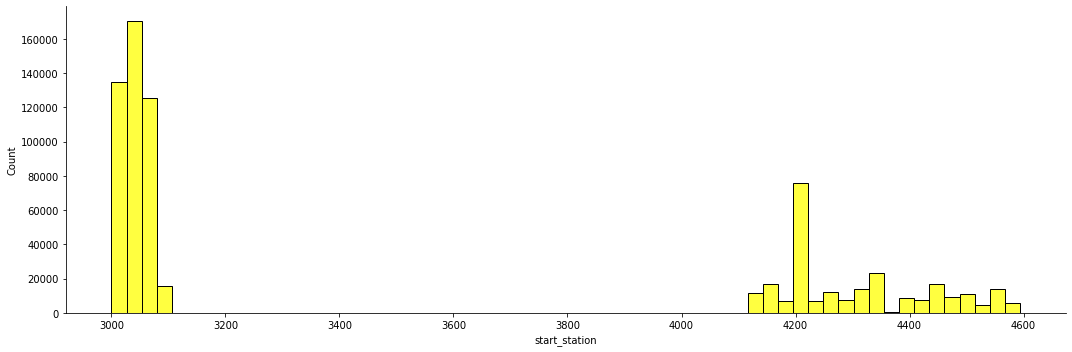

In [23]:
# Visualizamos la proporción de los datos
sns.displot(datos_train.start_station, height=5, aspect=3, color='yellow')

In [24]:
# Cantidad de personas que toman el servicio cada hora ordenados de mayor a menor
datos_train.start_time_hour_hour.value_counts()

17    63119
16    58049
18    54707
13    51835
15    51623
12    50755
14    49547
19    43425
11    42435
08    33901
09    33625
10    33081
20    31093
21    22546
07    22250
22    16050
23    11106
06     9913
00     7127
01     4709
02     3005
05     2951
04     1626
03     1522
Name: start_time_hour_hour, dtype: int64

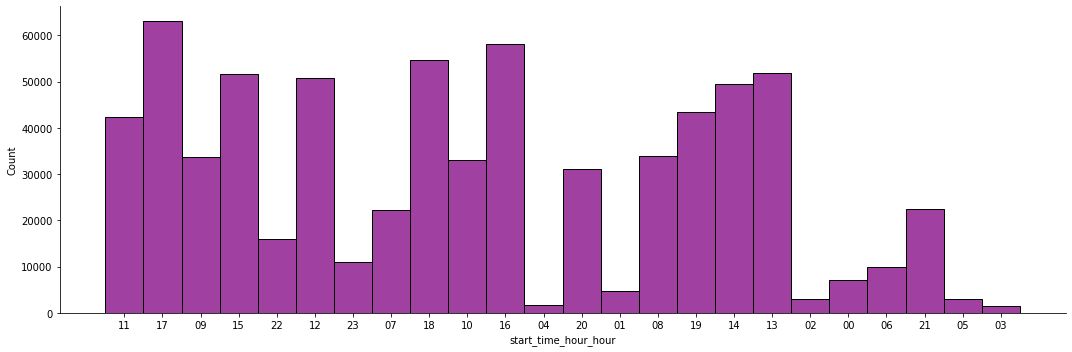

In [25]:
# Visualizamos esta proporción
sns.displot(datos_train.start_time_hour_hour, height=5, aspect=3, color='purple')

Para tener más claridad visual, haremos uso de una herramienta que nos facilita muchísimo la tarea de agrupar y filtrar datos.

El punto es observar la demanda de servicio en las distintas estaciones y horarios para cada plan. Esto se puede hacer muy fácilmente con Tablas dinámicas de Excel, además de que tiene un formato mucho más presentable y legible.

Entonces, hacemos una tabla que muestre las 5 estaciones más demandadas junto con la cantidad de usuarios que las visitan, para cada plan, como se nos solicita en la prueba.

<img src="Tabla_Estacion_Plan.png">

<img src="Grafica_Estacion_Plan.png">

Y de esta manera tenemos nuestra gráfica sobre la cantidad de usuarios que visitan las 5 estaciones más demandadas, y tenemos una barra para cada tipo de plan. 

Se puede observar que en la mayoría de los casos el plan Monthly Pass es el que sobresale, y por mucho. El segundo plan con más demanda sería entonces el Walk-up.

Ahora hacemos una tabla con la cantidad de personas que solicitan el servicio a lo largo del día, es decir, por hora (para tener una mejor visualización).

<img src="Tabla_Hora_Plan.png">

<img src="Grafica_Hora_Plan.png">

De esta forma podemos darnos cuenta que la demanda del servicio empieza a incrementar cuando comienza el día, y por ahí de las 2 de la tarde comienza a descender.

### Tarea 1.2 - Crecimiento de planes
Se tiene la intuición que la tendencia en uso de bicicletas compartidas va a la alta, por lo que se requiere realizar una correcta planificación de bicicletas que deben tener. Adicionalmente, se espera que los planes de consumo anual crezcan en mayor proporción.

In [26]:
# Veamos cuántos usuarios hay por año
datos_train.start_time_date_year.value_counts()

2018    171892
2019    160031
2017    126524
2020    115527
2021    102261
2016     23765
Name: start_time_date_year, dtype: int64

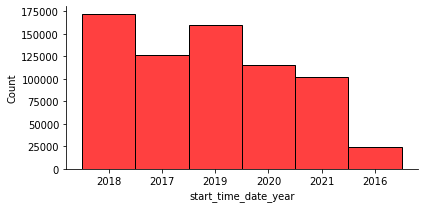

In [27]:
# Visualizamos esta proporción
sns.displot(datos_train.start_time_date_year, height=3, aspect=2, color='red')

Realizamos esta tarea con código de Python, pero nuevamente es mejor hacerlo con Excel, al menos para la visualización de resultados.

Entonces, veamos veamos la cantidad de personas que han adquirido el servicio de bicicletas por año y por cada plan para determinar si esta hipótesis es correcta.

<img src="Tabla_Anio_Plan.png">

<img src="Grafica_Anio_Plan.png">

Gracias a esta gráfica podemos darnos cuenta que en los años 2018 y 2019 fue cuando hubo una mayor demanda del servicio, pero que después de 2019 la demanda comenzó a bajar. Una hipótesis que podríamos generar es que la pandemia del COVID-19 afectó negativamente en la demanda del servicio.

Así que la hipótesis de que la demanda del servicio va a la alta es falsa.

Adicionalmente, se nos menciona que se espera que el servicio de Pase Anual también vaya a la alza. Nuevamente podemos observar en la tabla que desde el 2019 el consumo de pases anuales se ha mantenido casi constante, por lo que no se podría esperar que creciera para el siguiente año, sino que se esperaría que tuviera la misma demanda que el año anterior.

# Modelo analítico
Se desea saber si es posible inferir el tipo de pase tomando en cuenta las demás variables de viaje.

### Tarea 2.1
Construya un modelo analítico que incluya los puntos indispensables a considerar para un modelo (feature engineering, diseño de train-test split, cross-validation, métricas de desempeño, entre otros).

In [28]:
# Leemos los datos corregidos
datos_train_corregidos = pd.read_csv("C:\\Users\\Luis Carlos\\Documents\\Prueba_Arkon\\datos_train_corregidos.csv")

In [29]:
from sklearn import preprocessing, feature_extraction

Las siguientes clases deben ser modificadas para que sklearn se comporte de buena manera.

In [30]:
##### Modificar transformadores

class BinarizadorCategorico(preprocessing.LabelBinarizer):
    def fit(self, X, y=None):
        super(BinarizadorCategorico, self).fit(X)
        
    def transform(self, X, y=None):
        return super(BinarizadorCategorico, self).transform(X)

    def fit_transform(self, X, y=None):
        return super(BinarizadorCategorico, self).fit(X).transform(X)
    
    
class CodificadorCategorico(preprocessing.LabelEncoder):
    def fit(self, X, y=None):
        super(CodificadorCategorico, self).fit(X)
        
    def transform(self, X, y=None):
        return super(CodificadorCategorico, self).transform(X)

    def fit_transform(self, X, y=None):
        return super(CodificadorCategorico, self).fit(X).transform(X)

Utilizaremos una Regresión Logística como modelo.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

In [32]:
# Mostramos las columnas de nuestra tabla
datos_train_corregidos.columns

Index(['trip_id', 'duration', 'start_lat', 'start_lon', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type',
       'start_station', 'end_station', 'start_time_hour', 'end_time_hour',
       'start_time_date', 'end_time_date', 'start_time_hour_hour',
       'start_time_hour_minute', 'end_time_hour_hour', 'end_time_hour_minute',
       'start_time_date_day', 'start_time_date_month', 'start_time_date_year',
       'end_time_date_day', 'end_time_date_month', 'end_time_date_year'],
      dtype='object')

Hay ciertas columnas que no vamos a utilizar, ya que no pueden ser manejadas por el modelo o porque simplemente no aportan información relevante. Por ejemplo, las columnas 'start_time_hour', 'end_time_hour', 'start_time_date' y 'end_time_date' tienen datos en formato de fecha y hora, los cuales no podemos utilizar dentro del modelo, es por eso que separamos estos datos en clomunas diferentes anteriormente, para que nos quedaran datos numéricos que sí podemos utilizar. Por otra parte, las columnas 'trip_id' y 'bike_id' no aportan información relevante ya que la primera sirve solamente como un folio o un identificador de viaje, y la segunda es solamente un código único que tiene cada bicicleta, por lo que también las omitiremos.

Tenemos solamente una columna categórica dentro de nuestra tabla y las demás son numéricas.

In [33]:
col_numericas =  ['plan_duration', 'duration', 'start_lat', 'start_lon', 'end_lat', 'end_lon', 
                  'start_station', 'end_station', 'start_time_hour_hour',
                  'start_time_hour_minute', 'end_time_hour_hour', 'end_time_hour_minute',
                  'start_time_date_day', 'start_time_date_month', 'start_time_date_year',
                  'end_time_date_day', 'end_time_date_month', 'end_time_date_year']
col_categorica = ['trip_route_category']


imputador = SimpleImputer(missing_values=np.nan, copy=False)
escalador = preprocessing.StandardScaler()

transformador_ordinal = CodificadorCategorico()
transformador_categorico = BinarizadorCategorico()

transformador_texto = feature_extraction.text.TfidfVectorizer()

estimador = LogisticRegression(multi_class='multinomial')

In [34]:
from sklearn.pipeline import Pipeline

In [35]:
transformador_numerico = Pipeline(
     [('imputador', imputador), ('escalador', escalador)]
)

In [36]:
from sklearn.base import TransformerMixin
from sklearn.base import BaseEstimator
from scipy.sparse import issparse

# Estas clases también deben de ser modificadas para el correcto funcionamiento del modelo


# http://rasbt.github.io/mlxtend/
class DenseTransformer(BaseEstimator):
    def __init__(self, return_copy=True):
        self.return_copy = return_copy
        self.is_fitted = False

    def transform(self, X, y=None):
        if issparse(X):
            return X.toarray()
        elif self.return_copy:
            return X.copy()
        else:
            return X

    def fit(self, X, y=None):
        self.is_fitted = True
        return self

    def fit_transform(self, X, y=None):
        return self.transform(X=X, y=y)

class ColumnExtractor(TransformerMixin):

    def __init__(self, columns):
        self.columns = columns
        
    def transform(self, X, **transform_params):
        return X[self.columns].to_numpy()
    def fit(self, X, y=None, **fit_params):
        return self

In [37]:
pipeline_numerico = Pipeline([
    ['selector_numerico', ColumnExtractor(columns=col_numericas)],
    ['transformador_numerico', transformador_numerico]
])

pipeline_numerico.fit_transform(datos_train_corregidos)

array([[-4.73307526e-01, -1.66395714e-02, -9.13790619e-01, ...,
        -9.88851768e-01,  3.65455800e-01, -5.34539751e-01],
       [-4.84083063e-01, -4.05816469e-02, -2.86231022e-02, ...,
         1.45845008e-01,  6.63439910e-01, -1.24879132e+00],
       [-1.60816939e-01, -2.48079634e-01,  3.45183067e-03, ...,
         7.13193396e-01, -8.26480638e-01,  1.79711816e-01],
       ...,
       [ 3.44898812e+00, -2.48079634e-01,  1.52403177e-02, ...,
        -3.08033702e-01, -1.72043297e+00, -5.34539751e-01],
       [-4.73307526e-01, -2.72021710e-01,  7.07665979e-04, ...,
        -1.32926080e+00, -1.42244886e+00,  1.79711816e-01],
       [-4.73307526e-01,  1.74897032e-01, -1.87093211e-01, ...,
        -1.66966983e+00,  3.65455800e-01,  1.60821495e+00]])

In [38]:
pipeline_categorico = Pipeline([
    ['selector_categorica', ColumnExtractor(columns=col_categorica)],
    ['transformador_categorico', transformador_categorico]
])

pipeline_categorico.fit_transform(datos_train_corregidos)

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [39]:
from sklearn.pipeline import FeatureUnion

In [40]:
pipeline_procesado = FeatureUnion([
    ('variables_numericas', pipeline_numerico),
    ('variables_categoricas', pipeline_categorico),
])

In [41]:
pipeline_estimador = Pipeline([
    ('procesador', pipeline_procesado),
    ('estimador', estimador)
])

In [42]:
# Hacemos el ajuste
pipeline_estimador.fit(datos_train_corregidos,datos_train_corregidos["passholder_type"])

Pipeline(steps=[('procesador',
                 FeatureUnion(transformer_list=[('variables_numericas',
                                                 Pipeline(steps=[('selector_numerico',
                                                                  <__main__.ColumnExtractor object at 0x000001FDFA6CCDF0>),
                                                                 ['transformador_numerico',
                                                                  Pipeline(steps=[('imputador',
                                                                                   SimpleImputer(copy=False)),
                                                                                  ('escalador',
                                                                                   StandardScaler())])]])),
                                                ('variables_categoricas',
                                                 Pipeline(steps=[('selector_categorica',
                    

Ya tenemos listo el modelo para realizar predicciones. Observemos las primeras 20.

In [43]:
pipeline_estimador.predict(datos_train_corregidos)[:20]

array(['Walk-up', 'Walk-up', 'Monthly Pass', 'Walk-up', 'Monthly Pass',
       'Walk-up', 'Monthly Pass', 'Monthly Pass', 'Monthly Pass',
       'Monthly Pass', 'Walk-up', 'Walk-up', 'Walk-up', 'Walk-up',
       'Monthly Pass', 'Walk-up', 'Monthly Pass', 'Monthly Pass',
       'Monthly Pass', 'Monthly Pass'], dtype=object)

Ahora comparemos las predicciones con los valores reales.

In [44]:
datos_train_corregidos["passholder_type"].head(20)

0          Walk-up
1          Walk-up
2     Monthly Pass
3     One Day Pass
4     Monthly Pass
5          Walk-up
6     Monthly Pass
7          Walk-up
8     Monthly Pass
9          Walk-up
10         Walk-up
11    One Day Pass
12         Walk-up
13         Walk-up
14    Monthly Pass
15         Walk-up
16    Monthly Pass
17    Monthly Pass
18         Walk-up
19    Monthly Pass
Name: passholder_type, dtype: object

Ahora almacenemos las predicciones para después poder cuántos registros hay por cada tipo de pase.

In [45]:
predicciones_de_train = pipeline_estimador.predict(datos_train_corregidos)
tabla_predicciones_de_train = pd.DataFrame(predicciones_de_train, columns=['predicciones_de_pases_de_train'])
tabla_predicciones_de_train

,predicciones_de_pases_de_train
0,Walk-up
1,Walk-up
2,Monthly Pass
3,Walk-up
4,Monthly Pass
...,...
699995,Monthly Pass
699996,Monthly Pass
699997,Flex Pass
699998,Monthly Pass


In [46]:
tabla_predicciones_de_train.predicciones_de_pases_de_train.value_counts()

Monthly Pass    451120
Walk-up         192005
Annual Pass      37821
Flex Pass        11512
One Day Pass      7542
Name: predicciones_de_pases_de_train, dtype: int64

Procedamos entonces a realizar las validaciones cruzadas para determinar qué tan efectivo fue el modelo. Usaremos el scoring 'F1-Score'. Haremos 5 validaciones cruzadas y tomaremos el promedio de ellas.

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
cv_del_modelo = cross_val_score(pipeline_estimador, X=datos_train_corregidos.drop(['trip_id','bike_id', 'passholder_type',
                                                                  'start_time_hour', 'end_time_hour',
                                                                  'start_time_date', 'end_time_date'], axis=1), 
                y=datos_train_corregidos["passholder_type"], cv=5, scoring='f1_micro').mean()

cv_del_modelo

0.83506

El resultado fue impresionante, nos dice que sí resultó ser un muy buen modelo ya que el valor de la validación cruzada resultó muy cercano a 1.

Hagamos ahora las predicciones para la tabla Test. Para ello tendremos que realizar TODO el mismo procedimiento que hicimos para la tabla de Train. Separar los datos en diferentes columnas, cambiar los formatos de los datos para que todas las filas coincidan con el mismo, etcétera.

### Modificar la tabla Test para poder analizarla y realizar sus predicciones

In [49]:
datos_test = pd.read_csv("C:\\Users\\Luis Carlos\\Documents\\Prueba_Arkon\\test_set.csv")

In [50]:
datos_test

,trip_id,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,trip_route_category,start_station,end_station
0,17059130,12,1/1/2017 0:24,1/1/2017 0:36,34.058319,-118.246094,34.058319,-118.246094,6351,Round Trip,3028,3028
1,17059129,17,1/1/2017 0:28,1/1/2017 0:45,34.049980,-118.247162,34.043732,-118.260139,5836,One Way,3027,3018
2,17059126,20,1/1/2017 0:39,1/1/2017 0:59,34.063389,-118.236160,34.044159,-118.251579,6529,One Way,3066,3055
3,17059125,12,1/1/2017 0:43,1/1/2017 0:55,34.048851,-118.246422,34.050140,-118.233238,6029,One Way,3029,3079
4,17061379,48,1/1/2017 0:56,1/1/2017 1:44,34.049198,-118.252831,34.049198,-118.252831,6680,Round Trip,3063,3063
...,...,...,...,...,...,...,...,...,...,...,...,...
569881,179408277,19,12/31/2021 23:29,12/31/2021 23:48,34.040989,-118.255798,34.041130,-118.267982,14027,One Way,3033,3011
569882,179408276,8,12/31/2021 23:40,12/31/2021 23:48,34.044701,-118.252441,34.051941,-118.243530,20006,One Way,3031,3030
569883,179409877,43,12/31/2021 23:47,1/1/2022 0:30,34.044701,-118.252441,34.044701,-118.252441,16214,Round Trip,3031,3031
569884,179409876,42,12/31/2021 23:48,1/1/2022 0:30,34.044701,-118.252441,34.044701,-118.252441,13336,Round Trip,3031,3031


In [51]:
# Dividir la columna en 2 con el delimitador "espacio"
columnas_start = datos_test['start_time'].str.split(" ", n=1, expand=True)
columnas_end = datos_test['end_time'].str.split(" ", n=1, expand=True)

# Al resultado del split lo ponemos en la primera columna
datos_test['start_time_hour']= columnas_start[1]
datos_test['end_time_hour']= columnas_end[1]

# Hacemos lo mismo con la segunda columna
datos_test['start_time_date']= columnas_start[0]
datos_test['end_time_date']= columnas_end[0]

# Paso opcional, borramos la columna original
datos_test.drop(columns =['start_time'], inplace = True)
datos_test.drop(columns =['end_time'], inplace = True)

In [52]:
# Hacemos que todos los registros de las columnas de fecha tengan el mismo formato
datos_test['start_time_date'] = pd.to_datetime(datos_test['start_time_date']) 
datos_test['start_time_date'] = datos_test['start_time_date'].dt.strftime('%d/%m/%Y')

datos_test['end_time_date'] = pd.to_datetime(datos_test['end_time_date']) 
datos_test['end_time_date'] = datos_test['end_time_date'].dt.strftime('%d/%m/%Y')

In [53]:
# Dividir las columnas con el delimitador "dos puntos"
column_only_hour_start = datos_test['start_time_hour'].str.split(":", n=2, expand=True)
column_only_hour_end = datos_test['end_time_hour'].str.split(":", n=2, expand=True)

#Al resultado del split lo ponemos en columnas diferentes
datos_test['start_time_hour_hour'] = column_only_hour_start[0]
datos_test['start_time_hour_minute'] = column_only_hour_start[1]
datos_test['end_time_hour_hour'] = column_only_hour_end[0]
datos_test['end_time_hour_minute'] = column_only_hour_end[1]

In [54]:
# Dividir las columnas con el delimitador "diagonal"
column_only_date_start = datos_test['start_time_date'].str.split("/", n=2, expand=True)
column_only_date_end = datos_test['end_time_date'].str.split("/", n=2, expand=True)

#Al resultado del split lo ponemos en columnas diferentes
datos_test['start_time_date_day'] = column_only_date_start[0]
datos_test['start_time_date_month'] = column_only_date_start[1]
datos_test['start_time_date_year'] = column_only_date_start[2]

datos_test['end_time_date_day'] = column_only_date_end[0]
datos_test['end_time_date_month'] = column_only_date_end[1]
datos_test['end_time_date_year'] = column_only_date_end[2]

In [55]:
# Corregimos los valores para que queden registrados con 2 caracteres
datos_test['start_time_hour_hour'] = datos_test['start_time_hour_hour'].replace(
    ['6', '0', '1', '2', '5', '4', '3', '9', '8', '7'],['06', '00', '01', '02', '05', '04', '03', '09', '08', '07'])

datos_test['end_time_hour_hour'] = datos_test['end_time_hour_hour'].replace(
    ['6', '0', '1', '2', '5', '4', '3', '9', '8', '7'],['06', '00', '01', '02', '05', '04', '03', '09', '08', '07'])

In [56]:
# Rellenamos los datos numéricos faltantes
datos_test.start_lat = datos_test.start_lat.fillna(datos_test.start_lat.mean())
datos_test.start_lon = datos_test.start_lon.fillna(datos_test.start_lon.mean())
datos_test.end_lat = datos_test.end_lat.fillna(datos_test.end_lat.mean())
datos_test.end_lon = datos_test.end_lon.fillna(datos_test.end_lon.mean())

# Rellenamos los datos categóricos faltantes
datos_test.end_time_date = datos_test.end_time_date.fillna(datos_test.end_time_date.mode()[0])
datos_test.end_time_date_day = datos_test.end_time_date_day.fillna(datos_test.end_time_date_day.mode()[0])
datos_test.end_time_date_month = datos_test.end_time_date_month.fillna(datos_test.end_time_date_month.mode()[0])
datos_test.end_time_date_year = datos_test.end_time_date_year.fillna(datos_test.end_time_date_year.mode()[0])

In [57]:
datos_test

,trip_id,duration,start_lat,start_lon,end_lat,end_lon,bike_id,trip_route_category,start_station,end_station,...,start_time_hour_hour,start_time_hour_minute,end_time_hour_hour,end_time_hour_minute,start_time_date_day,start_time_date_month,start_time_date_year,end_time_date_day,end_time_date_month,end_time_date_year
0,17059130,12,34.058319,-118.246094,34.058319,-118.246094,6351,Round Trip,3028,3028,...,00,24,00,36,01,01,2017,01,01,2017
1,17059129,17,34.049980,-118.247162,34.043732,-118.260139,5836,One Way,3027,3018,...,00,28,00,45,01,01,2017,01,01,2017
2,17059126,20,34.063389,-118.236160,34.044159,-118.251579,6529,One Way,3066,3055,...,00,39,00,59,01,01,2017,01,01,2017
3,17059125,12,34.048851,-118.246422,34.050140,-118.233238,6029,One Way,3029,3079,...,00,43,00,55,01,01,2017,01,01,2017
4,17061379,48,34.049198,-118.252831,34.049198,-118.252831,6680,Round Trip,3063,3063,...,00,56,01,44,01,01,2017,01,01,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569881,179408277,19,34.040989,-118.255798,34.041130,-118.267982,14027,One Way,3033,3011,...,23,29,23,48,31,12,2021,31,12,2021
569882,179408276,8,34.044701,-118.252441,34.051941,-118.243530,20006,One Way,3031,3030,...,23,40,23,48,31,12,2021,31,12,2021
569883,179409877,43,34.044701,-118.252441,34.044701,-118.252441,16214,Round Trip,3031,3031,...,23,47,00,30,31,12,2021,01,01,2022
569884,179409876,42,34.044701,-118.252441,34.044701,-118.252441,13336,Round Trip,3031,3031,...,23,48,00,30,31,12,2021,01,01,2022


### Tarea 2.2
Interprete el resultado en contexto del problema y determine qué variables impactan en la predicción.

El resultado del modelo fue muy bueno, las validaciones cruzadas arrojaron resultados por arriba de 0.8 lo cual es muy cercano a 1, por lo que podemos decir que el resultado fue muy bueno. Ahora procedamos a hablar de algo curioso...

In [58]:
# Mostramos las columnas
datos_test.columns

Index(['trip_id', 'duration', 'start_lat', 'start_lon', 'end_lat', 'end_lon',
       'bike_id', 'trip_route_category', 'start_station', 'end_station',
       'start_time_hour', 'end_time_hour', 'start_time_date', 'end_time_date',
       'start_time_hour_hour', 'start_time_hour_minute', 'end_time_hour_hour',
       'end_time_hour_minute', 'start_time_date_day', 'start_time_date_month',
       'start_time_date_year', 'end_time_date_day', 'end_time_date_month',
       'end_time_date_year'],
      dtype='object')

Aquí hay que presar mucha atención a que nuestra tabla Test no tiene la columna 'plan_duration', la cual nos indica el número de días que el usuario tendrá el paso. Estos datos son de vital importancia para el modelo ya que le permiten inferir de qué tipo de pase se trata, ya que por ejemplo, si hay un 0 significa que fue un viaje único, es decir, corresponde a la categoría Walk-up, si tiene un 1 significa que pertenece a la categoróa One Day Pass, si tiene alrededor de 30 a Monthly Pass, si tiene 365 a Annual Pass, etcétera.

Lo que haremos será agregar una columna entera con el mismo nombre para que el modelo pueda tomarla, pero con datos nulos, ya que si escribimos algún dato como por ejemplo un 1, un 30, o cualquier otro, el modelo puede confundirse y pensar erróneamente que se trata de datos auténticos y relacionarlos directamente con el tipo de pase. Entonces, agregamos una columna con datos nulos y dejamos que el modelo haga sus predicciones en base a las demás columnas.

In [59]:
datos_test['plan_duration'] = np.nan

In [60]:
datos_test

,trip_id,duration,start_lat,start_lon,end_lat,end_lon,bike_id,trip_route_category,start_station,end_station,...,start_time_hour_minute,end_time_hour_hour,end_time_hour_minute,start_time_date_day,start_time_date_month,start_time_date_year,end_time_date_day,end_time_date_month,end_time_date_year,plan_duration
0,17059130,12,34.058319,-118.246094,34.058319,-118.246094,6351,Round Trip,3028,3028,...,24,00,36,01,01,2017,01,01,2017,NaN
1,17059129,17,34.049980,-118.247162,34.043732,-118.260139,5836,One Way,3027,3018,...,28,00,45,01,01,2017,01,01,2017,NaN
2,17059126,20,34.063389,-118.236160,34.044159,-118.251579,6529,One Way,3066,3055,...,39,00,59,01,01,2017,01,01,2017,NaN
3,17059125,12,34.048851,-118.246422,34.050140,-118.233238,6029,One Way,3029,3079,...,43,00,55,01,01,2017,01,01,2017,NaN
4,17061379,48,34.049198,-118.252831,34.049198,-118.252831,6680,Round Trip,3063,3063,...,56,01,44,01,01,2017,01,01,2017,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569881,179408277,19,34.040989,-118.255798,34.041130,-118.267982,14027,One Way,3033,3011,...,29,23,48,31,12,2021,31,12,2021,NaN
569882,179408276,8,34.044701,-118.252441,34.051941,-118.243530,20006,One Way,3031,3030,...,40,23,48,31,12,2021,31,12,2021,NaN
569883,179409877,43,34.044701,-118.252441,34.044701,-118.252441,16214,Round Trip,3031,3031,...,47,00,30,31,12,2021,01,01,2022,NaN
569884,179409876,42,34.044701,-118.252441,34.044701,-118.252441,13336,Round Trip,3031,3031,...,48,00,30,31,12,2021,01,01,2022,NaN


In [61]:
# Hacemos las predicciones
predicciones_test = pipeline_estimador.predict(datos_test)

In [62]:
 tabla_predicciones = pd.DataFrame(predicciones_test, columns=['predicciones_de_pases'])

In [63]:
tabla_predicciones

,predicciones_de_pases
0,Monthly Pass
1,Monthly Pass
2,Monthly Pass
3,Monthly Pass
4,Monthly Pass
...,...
569881,Monthly Pass
569882,Monthly Pass
569883,Monthly Pass
569884,Monthly Pass


In [64]:
# Vemos la proporción de estos datos
tabla_predicciones.value_counts()

predicciones_de_pases
Monthly Pass             552651
Walk-up                   17156
Annual Pass                  79
dtype: int64

Vemos que la mayoría de resultados fueron Monthly Pass, sólo una mínima cantidad resultó como Walk-up y para terminar, las demás categorías no aparecieron. Esto fue algo que me dejó pensando, pero creo que tuvo que ver mucho el que la tabla de Test no tuviera la columna 'plan_duration', lo cual me lleva a pensar que ésta es importantísima para el modelo.

Y como consecuencia, podemos inferir que si quitamos esta columna del modelo éste no se comportará tan bien como lo hace.

### Tarea 2.3

Tomando en cuenta los exploratorios y el modelo analítico, ¿cree que es un buen modelo? ¿Qué variables adicionales añadiría para mejorar el modelo?

Lo que sucede es que el modelo aprendió en base a los datos de la tabla Train.
La tabla Test sí es muy parecida a la tabla Train, a excepción de la columna 'plan_duration'.

El modelo se comporta de muy buena manera con la tabla Train. Tiene una putuación F1-Score de 0.83621, cercana a 1.
Pero a la hora de utilizarlo en la tabla de Test arroja casi todos los resultados como Monthly Pass, y aquí hay 2 cosas para pensar:
1) Casi todos los datos de la tabla sí son Monthly Pass.
2) Disminuyó la efectividad el modelo por haber omitido una columna entera de datos.

De cualquier forma, la variable que agregaría sería la mencionada anteriormente, la columna 'plan_duration'. Si la tabla Test tuviera esta columna el modelo se comportaría de forma menos peculiar.

### Tarea 3 Evaluación del modelo

Para la evaluación del modelo se realiza de manera automática a través de la plataforma de kaggle en la siguiente liga:
https://www.kaggle.com/t/e82d8dd1223a4a459037106a2acab561

En el tab de Data aparecen tres archivos:
● train_set.csv: datos que servirán para construir el modelo
● test_set.csv: datos que no tienen la variable dependiente y que se debe hacer
predicción
● sample_submission.csv: formato en el cual se debe subir las predicciones


La base de entrenamiento es a nivel viaje. Para enriquecer la base (esto es
opcional) se cuenta con una tabla con información de las estaciones de
bicicletas. Esta última se puede acceder por medio de una API, por lo que
puedes ocupar la librería requests en python o bien el paquete httr de R:
● URL: https://api.bit.io/api/v1beta/query/
● Para acceder se debe realizar un POST enviando un JSON que indica la query a
realizar (no quitar el LIMIT) { "query_string": "SELECT * from
\"savrgg/ds_test\".\"cat_station\" LIMIT 216" }
● Se deben incluir los siguientes headers: headers = { "Accept":
"application/json", "Content-Type": "application/json",
"Authorization": "Bearer {TOKEN}" }
● El TOKEN se compartirá individualmente para poder acceder a los datos.

En el tab de Submit Predictions se hace upload de un archivo con el formato
adecuado. Favor de registrarse con algún pseudónimo que no esté relacionado
con su nombre. El objetivo no es llegar al mejor resultado en términos de la
métrica de error, si no estar seguros de tomar en cuenta aspectos indispensables al
crear este modelo analítico. Por lo que sobrepasando el benchmark se considera una
buena entrega.

### Guardar las predicciones
Necesitamos primero ver en qué formato debemos guardar las predicciones.

In [65]:
# Leemos la tabla de formato
formato_prueba = pd.read_csv("C:\\Users\\Luis Carlos\\Documents\\Prueba_Arkon\\sample_submission.csv")

In [66]:
# Vemos la tabla de formato
formato_prueba

,trip_id,passholder_type
0,17059130,Monthly Pass
1,17059129,Monthly Pass
2,17059126,Monthly Pass
3,17059125,Monthly Pass
4,17061379,Monthly Pass
...,...,...
569881,179408277,Monthly Pass
569882,179408276,Monthly Pass
569883,179409877,Monthly Pass
569884,179409876,Monthly Pass


Y tenemos nuestra tabla de predicciones como:

In [67]:
tabla_predicciones

,predicciones_de_pases
0,Monthly Pass
1,Monthly Pass
2,Monthly Pass
3,Monthly Pass
4,Monthly Pass
...,...
569881,Monthly Pass
569882,Monthly Pass
569883,Monthly Pass
569884,Monthly Pass


Lo único que nos hace falta es agregarle la columna del de 'trip_id'.

In [68]:
tabla_predicciones['trip_id'] = datos_test['trip_id']

In [69]:
tabla_predicciones

,predicciones_de_pases,trip_id
0,Monthly Pass,17059130
1,Monthly Pass,17059129
2,Monthly Pass,17059126
3,Monthly Pass,17059125
4,Monthly Pass,17061379
...,...,...
569881,Monthly Pass,179408277
569882,Monthly Pass,179408276
569883,Monthly Pass,179409877
569884,Monthly Pass,179409876


Listo. La tabla ya tiene el formato deseado. Ahora sólo es cuestión de guardarla.

In [70]:
# Guardamos nuestra tabla de predicciones
tabla_predicciones.to_csv("C:\\Users\\Luis Carlos\\Documents\\Prueba_Arkon\\tabla_predicciones.csv", index=False)

### Tarea 4

Por último, se desea poner en producción el modelo. Describa qué pasos y consideraciones usted tomaría para lograrlo.

Si es en un servidor local crearía un entorno por medio de una API con Conda. Si es para un servidor en la nube pues ya se tomaría en cuenta en qué plataforma se desea trabajar. Una buena idea sería automatizar un script por medio de  Google Cloud o de cualquier otra prataforma, ya que algunas veces una automatización puede ser suficiente para poner algo en producción, sin embargo otras veces necesitamos que otros servicios usen ese algoritmo.

La idea sería que los usuarios tengan un formulario en la web en el cual puedan introducir valores de variables y que como respuesta te arroje el tipo de pase de ese registro, es decir, que uando un usuario en la web envíe un formulario, los datos del formulario entren como input a nuestro modelo y este devuelva la predicción correspondiente, y que además se muestre en la página. Adicional a eso, mencionarle al usuario que ingrese el tipo de dato correspondiente, es decir, que si una columna trabaja con enteros, que ingrese un número entero, y que si intenta ingresar otro tipo de dato que no sea entero, ya sea una cadena, un flotante, etcétera, que aparezca un aviso de error y que le mencione que ingrese un valor válido.